In [1]:
using Graphs, GraphIO, GraphPlot, NetworkDynamics, OrdinaryDiffEq, Plots, Graphs, Printf


#f=open("net_celegans_neural.dat")




In [2]:
using LinearAlgebra, IterativeSolvers, Statistics

function get_levels(A)
    
    A= convert(Array{Float64}, A)
    
    w_in = vec(sum(A, dims=1))
   
    w_out= vec(sum(A, dims=2))
    
   
    
    u = w_in + w_out 
    
    v= w_in - w_out 
   
    Lambda=  diagm(u)-  A - transpose(A)
    
   
    Lambda[1,1]= 0 
    
    #h= bicgstabl(Lambda, v, 10)
    h=  lsmr(Lambda, v)   
       
    h= h .- minimum(h)
    
    return h
end

get_levels (generic function with 1 method)

In [3]:
function calc_troph_incoh(A,h)
    
    F=0

    for (x,y,v) in zip(findnz(A)...)
  
    
        F = F + v*(h[y] - h[x] -1 )^2
        
    end
    
    F= F/sum(A)
    
end
    
    
    
    
    

calc_troph_incoh (generic function with 1 method)

In [4]:
using SparseArrays

using NetworkDynamics


function kuramoto_edge!(e, θ_s, θ_d, K, t)
    e[1] = K * sin(θ_s[1] - θ_d[1])
end

function kuramoto_vertex!(dθ, θ, edges, ω, t)
    dθ[1] = ω
    sum_coupling!(dθ, edges)
end

vertex = ODEVertex(; f = kuramoto_vertex!, dim = 1, sym=[:θ])
edge   = StaticEdge(; f = kuramoto_edge!, dim = 1, coupling = :directed)


StaticEdge{typeof(kuramoto_edge!)}(kuramoto_edge!, 1, :directed, [:e])

In [143]:
using LinearAlgebra, OrdinaryDiffEq, Random
using Arpack

segments = 20

instances= 30

number=instances*segments


N=500

#T_list= LinRange(0.025, 8, number)

T_list_org= 10 .^ (range(-1,stop=2,length=segments))


T_list= zeros(0)



for a in 1:instances
    print(a)
    if a==0
        
    T_list = T_list_org    
    end
    
    T_list = vcat(T_list,T_list_org)
    
    end 


#T_list= 1.2*ones(number)

B=0

F_list = zeros(0)

L_targ = 5*N

stop= 2*N^2

eig_list= zeros(0)

r_list= zeros(0)

phase_list = zeros(0)


#stop = 5

#w_in=1

for n in 1:number
    
    println(n)
    
    
    g = SimpleDiGraph(N)
    
   
    for i in (1+B):N
        
        pick = rand(B+1:N)
        
        add_edge!(g, pick, i)
        
        
        end 
    A = (adjacency_matrix(g))
    
    L=sum(A)
    
    h = get_levels(A)
    
    
    edgelist= Int[]
    
    problist= zeros(0)
    
    edge_start= zeros(Int64,0)
    
    edge_end = zeros(Int64, 0)
    
    
    for i in 1:N
        
        for j in (B+1):N
            
            if A[i,j]!=1 && i!=j
                #Fix Array indexing here doesn't make sense. Need 2d array
                append!( edgelist, [i,j] )
                append!( edge_start, i )
                append!(edge_end, j )
                
                prob = exp(-((h[j]-h[i] -1)^2)/T_list[n]/2)
                
                
                
                append!( problist, prob )
            end
            
            
            
            end
        
            end 
    
    prob_sum = sum(problist)
    
    loop_size= size(problist, 1)
    
    
    
    #b=0
    
    #for d in 1:size(problist, 1)
        
        #b= A[(edgelist[d])[1],(edgelist[d])[2] ] + b
    #end
       
    #println(b)
        
    count=0
    
    #println(edgelist[500])
    
    while (-L + L_targ)>0
        
        count = count + 1 
        
        prob_sum = sum(problist)
        
        random = prob_sum*(rand())
        
        
        z=0
        
        
        for k in 1:loop_size
            
            z= z + problist[k]
            
           
            if z>=random
               
                if A[edge_start[k],edge_end[k]]==0
                
                   A[edge_start[k],edge_end[k]]=1
                    
                   problist[k]=0 
                
                    L = L +1
                    
                    break
                       
                else 
                    
                    println("Missed")
                    println(A[(edgelist[k])])
                    break
                   
              
                end     
            
            end
                end
            
            if (count-stop)>=0
            
                
                
            
                break
        
            
            
                end
        
    end
        
    
    
    

   
    
    
h = get_levels(A)
    
F= calc_troph_incoh(A,h)    
append!( F_list, F )  
    
#println(maximum(real(eigvals(Matrix(A)))))

    
append!( eig_list, maximum(real(eigvals(Matrix(A))))  )  

g= SimpleDiGraph((A))    
    
    
nd = network_dynamics(vertex, edge, g; parallel=true)
    
w_in = vec(sum(A, dims=1))    

#ω = collect(1:N)./N
#ω  .-= sum(ω)/N
    
ω =   0*randn(N)
   
#K  = 1.0
    
    
 edge_k = zeros(0)        

    for e in edges(g)
        append!(edge_k, 1/(  size(inneighbors(g,dst(e)))[1]))
            
        end
           
    

K= edge_k*(L_targ/N )*10  
    
    
p  = (ω, K); # p[1] vertex parameters, p[2] edge parameters    
    
#x0 = collect(1:N)./N
#x0 .-= sum(x0)./N
    
#x0 =   2*pi*rand(N) .- pi 
#x0 =   randn(N) 
    
x0 =  zeros(0) 
    
#frac=  0.05*maximum(h)
    
#for i in 1:N
        
      #append!(x0, pi*(sign(h[i] - frac ))/2 + pi/2 ) 
        
        
    #end
frac= floor(Int,0.2*N)    
sorted = (sortperm(h))    
    
#x0 = sign.(h .- frac)
    
    
x0= pi*ones(N)
   
    
for b in 1:frac
  
    x0[sorted[b]]= 0
    
    
    #println(h[sorted[b]])
    end    
    
    

    
tspan = (0., 100.)
prob = ODEProblem(nd, x0, tspan, p)
sol = solve(prob, Tsit5())
#println(sol)
#display(plot(sol, ylabel="θ", legend = false, title=("Julia Dynamics Tests F = %0.2f\n " F_list[1])))
    
   

#display(plot(sol, ylabel="θ", legend = false ,title= (@sprintf("Julia Dynamics F= %.3f", F))))   
    
#savefig("High_Report_Kuramoto.pdf") 
#println(sol)
#println(size(sol[size(sol)[2]]))


r=  abs(sum(exp.(sol[size(sol)[2]]*im )))/N  

#r= abs(sum(exp.(sol[1]*im )))/N 
    
append!( r_list, r )   
    
phase=  mean(sol[size(sol)[2]])   
append!( phase_list, phase) 
    
println(phase)    
end



println(F_list)


println(phase_list)

1234567891011121314151617181920212223242526272829301
1.3360477441463727e-9
2
1.2546023469366465e-9
3
0.015681800944655017
4
5.7832775758240375e-6
5
0.0030615206905647402
6
2.2072450749928204e-10
7
-3.105558907570797e-9
8
0.2808868080013668
9
0.7190691208150097
10
0.6483097295914452
11
1.7425434513247204
12
1.349924099016347
13
1.6802182895825064
14
2.041853541477134
15
2.079075990056394
16
2.179681740202908
17
2.242768563812223
18
2.184404246220702
19
2.1860938884998258
20
2.2314227615440045
21
-1.2070391007219789e-9
22
-1.742975980980391e-9
23
3.173763517309138e-9
24
5.274922674238865e-8
25
-1.0377095978182201e-9
26
0.04507073706931512
27
0.1347555902721254
28
3.8390855431071205e-10
29
6.012369948728459e-10
30
0.9720584298860361
31
1.2791092488412668
32
2.8110301506464913e-5
33
1.765456534613289
34
1.9188011958646038
35
2.194530216668918
36
2.1043203333555587
37
2.1758893802859514
38
2.210116858877431
39
2.1664691848226947
40
2.2175731865453483
41
5.983777414507486e-6
42
1.10422855776

1.3682903507652926e-9
347
0.07683735257094482
348
0.2820484066525543
349
0.84927787676292
350
1.008370558046853
351
1.167649903737511
352
1.5565810003320657
353
1.929771873998444
354
1.9426472206063454
355
2.1640286304077065
356
2.131236254862029
357
2.2198413313989858
358
2.2202161859854157
359
2.2039652366485827
360
2.2080385730113905
361
0.6736878476476504
362
1.63758915610611e-9
363
0.037699112483278605
364
1.7753633230809918e-10
365
-1.7888665476368471e-9
366
-3.229812152993691e-9
367
0.07539822247545837
368
0.7513861819522385
369
-4.7109115754841235e-9
370
-1.566150975970346e-9
371
1.5835856711734762
372
1.648618292764426
373
-3.2222547600451566e-11
374
2.100302834036488
375
2.156902829366364
376
2.139226345600082
377
2.1022747341299493
378
2.178738309432164
379
2.189617133198883
380
2.2298941697446755
381
0.006283185045858735
382
5.303689250094229e-9
383
0.024239854175546645
384
-8.320668278779486e-10
385
0.006529972582651347
386
0.11152764244148747
387
-7.473230027427237e-10
38

[1.3360477441463727e-9, 1.2546023469366465e-9, 0.015681800944655017, 5.7832775758240375e-6, 0.0030615206905647402, 2.2072450749928204e-10, -3.105558907570797e-9, 0.2808868080013668, 0.7190691208150097, 0.6483097295914452, 1.7425434513247204, 1.349924099016347, 1.6802182895825064, 2.041853541477134, 2.079075990056394, 2.179681740202908, 2.242768563812223, 2.184404246220702, 2.1860938884998258, 2.2314227615440045, -1.2070391007219789e-9, -1.742975980980391e-9, 3.173763517309138e-9, 5.274922674238865e-8, -1.0377095978182201e-9, 0.04507073706931512, 0.1347555902721254, 3.8390855431071205e-10, 6.012369948728459e-10, 0.9720584298860361, 1.2791092488412668, 2.8110301506464913e-5, 1.765456534613289, 1.9188011958646038, 2.194530216668918, 2.1043203333555587, 2.1758893802859514, 2.210116858877431, 2.1664691848226947, 2.2175731865453483, 5.983777414507486e-6, 1.1042285577675969e-8, 0.002516946631439455, 0.0029055408281132137, 0.22679129418264407, -1.1178072602149712e-10, 0.030105033012706905, 0.4

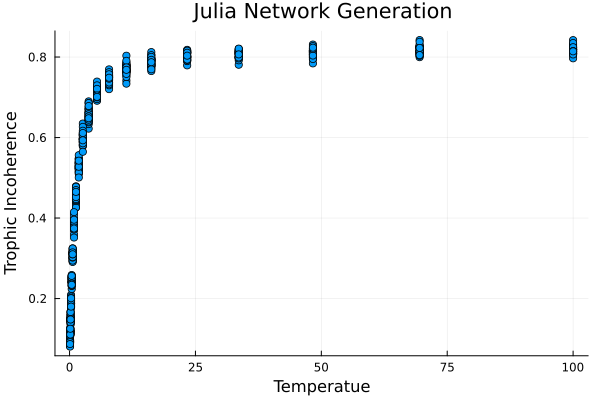

In [144]:
using Plots

plot(T_list,F_list, seriestype = :scatter, legend = false, xlabel= "Temperatue",

ylabel="Trophic Incoherence", title= "Julia Network Generation")

#savefig("Julia_generation_log_space.pdf")

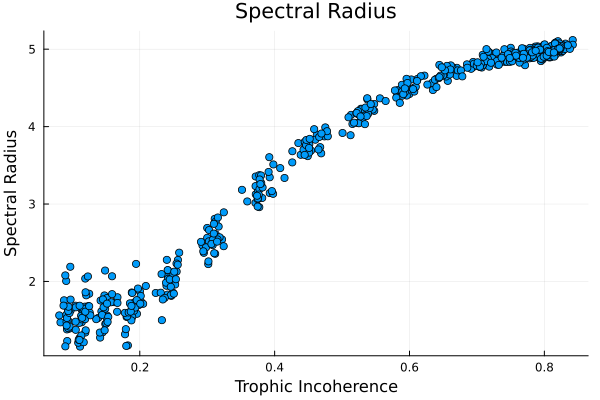

In [145]:
#println(eig_list)

plot(F_list, eig_list, seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Spectral Radius", title= "Spectral Radius")


#savefig("Julia_generation_Spec_radius_logspace_2.pdf")

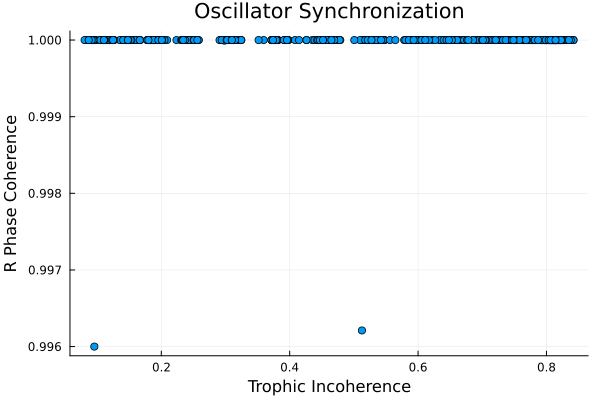

In [146]:
plot(F_list, r_list, seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="R Phase Coherence", title= "Oscillator Synchronization")


#savefig("Oscillator_Omega_equals_h_degree.pdf")

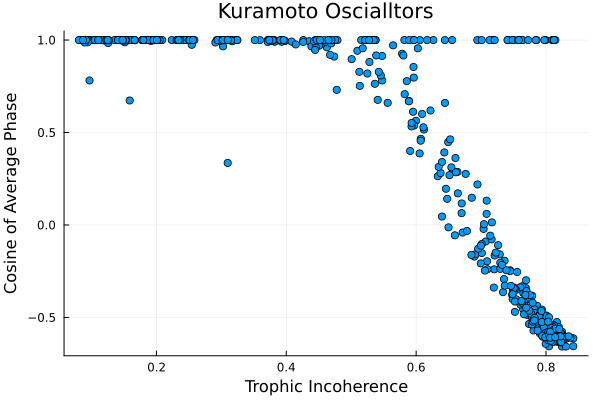

In [147]:
plot(F_list, cos.(phase_list), seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Cosine of Average Phase", title= "Kuramoto Oscialltors")

#savefig("Mean_degree_generated_Kuramtoto_N_100_GRS3.pdf")

In [148]:
F_org= copy(F_list)

T_org= copy(T_list)

S_org= copy(cos.(phase_list))

600-element Vector{Float64}:
  1.0
  1.0
  0.9998770430793827
  0.9999999999832768
  0.9999953135491911
  1.0
  1.0
  0.960809986041888
  0.7524192107849246
  0.7971055895242146
 -0.17090402930369608
  0.2190807448247584
 -0.10920373891712107
  ⋮
  0.8282315883167864
  0.5515361909232737
  0.1415584605935742
  1.0
 -0.37423549923325883
 -0.37874894284737165
 -0.5710311820356645
 -0.5228294812756474
 -0.6092720746981608
 -0.6325848514284882
 -0.6024794280486452
 -0.6068711995760498

In [149]:
using Statistics

T_list=(reshape(T_list,(segments,instances)))

F_list=(reshape(F_list,(segments,instances)))

S_list=(reshape(cos.(phase_list),(segments,instances)))


F_mean =zeros(segments)
F_error =zeros(segments)

S_mean= zeros(segments)

S_error= zeros(segments)

T_mean = zeros(segments)

print(T_list[1,:])

for a in 1:segments
    
    print(T_list[a,:])
    
    F_mean[a] = mean(F_list[a,:])
    
    F_error[a] = std(F_list[a,:])
    
    T_mean[a] = mean(T_list[a,:])
    
    S_mean[a] = mean(S_list[a,:])
    
    S_error[a] = std(S_list[a,:])
    
    end 

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1][0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1][0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628][0.20691380811147897, 0.20691380811147897, 0.20691380811147897, 0.2069

, 48.32930238571752, 48.32930238571752, 48.32930238571752, 48.32930238571752, 48.32930238571752][69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606, 69.51927961775606][100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]

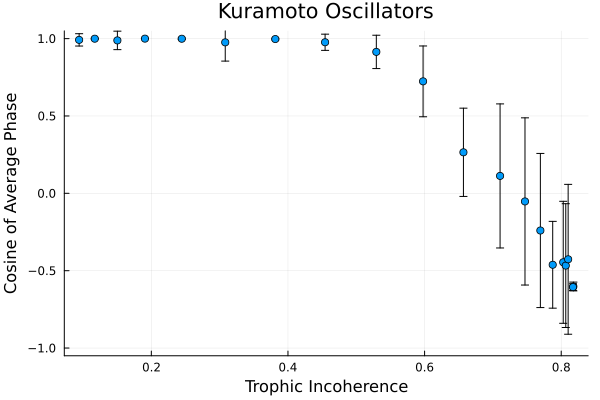

In [150]:
plot(F_mean, S_mean, seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Cosine of Average Phase", ylim=(-1.05,1.05), yerror = S_error, error=F_error, title= "Kuramoto Oscillators")

#savefig("Kuramto_standard_error_N_500_K_5_30_repeats.pdf")

In [152]:
plot(F_org, S_org, seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Cosine of Average Phase", title= "Kuramoto Oscillators", ; label="Generated Networks", ylim=(-1.05,1.05))

plot!(F_mean,S_mean, lw=4,   line=:red, ls=:dash, fillalpha=.4, c=:pink,ribbon=S_error, label="Cosine of Mean Phase", legend = :true)


#savefig("Kuramto_20_percenet_N_500_K_5_30_repeats_stdev.pdf")

"/Users/niallrodgers/OneDrive - University of Birmingham/Julia/Kuramto_20_percenet_N_500_K_5_30_repeats_stdev.pdf"

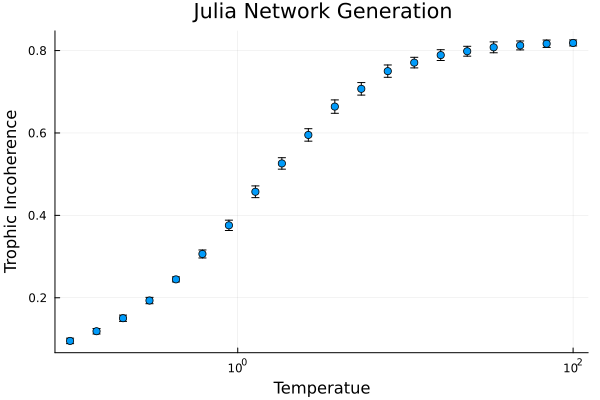

In [103]:
plot(T_mean,F_mean, seriestype = :scatter, legend = false, xlabel= "Temperatue",

ylabel="Trophic Incoherence", title= "Julia Network Generation", xaxis=:log, yerror= F_error)

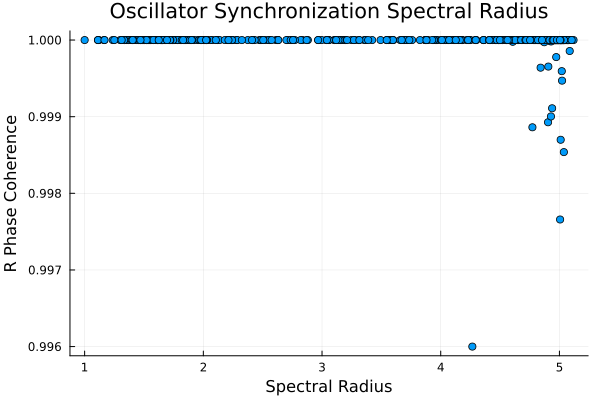

In [104]:
plot(eig_list, r_list, seriestype = :scatter, legend = false, xlabel= "Spectral Radius",

ylabel="R Phase Coherence", title= "Oscillator Synchronization Spectral Radius")